In [1]:
import pandas as pd

In [2]:
from sklearn.decomposition import NMF

In [29]:
top_dir = r"C:\Users\Petar\Desktop\Istrazivanje Podataka 2\ip2_seminarski\istrazivanje_podataka2_seminarski\ir_data"

In [61]:
df = pd.read_csv(top_dir + "\\GSM3374614.csv")
df.head()

,gene_id,ENSG00000181638_ZFP41,ENSG00000111875_ASF1A,ENSG00000176142_TMEM39A,ENSG00000135624_CCT7,ENSG00000137628_DDX60,ENSG00000187266_EPOR,ENSG00000157191_NECAP2,ENSG00000149150_SLC43A1,ENSG00000136802_LRRC8A,...,ENSG00000128590_DNAJB9,ENSG00000081087_OSTM1,ENSG00000118690_ARMC2,ENSG00000214402_LCNL1,ENSG00000246662_LINC00535,ENSG00000167085_PHB,ENSG00000179532_DNHD1,ENSG00000267114_CTB-129P6.11,ENSG00000125122_LRRC29,ENSG00000128016_ZFP36
0,GSM3374614_1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
1,GSM3374614_2,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,GSM3374614_3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,GSM3374614_4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GSM3374614_5,0,0,0,1,0,0,0,0,0,...,2,0,0,0,0,4,0,0,0,0


In [62]:
import numpy as np

In [31]:
def filter_by_percentage(df, p=1):
    """
    :param df: DataFrame
    :param p: Positive Int
    :return: DataFrame
    returns DataFrame without columns that have less than p% non-zero values
    """
    columns_non_zero_percentages = (df != 0) \
                                        .sum() \
                                        .apply(lambda x: x / df.shape[1] * 100)
    columns_to_keep = (columns_non_zero_percentages > p).values
    return df.iloc[:, columns_to_keep]

In [32]:
def filter_cells(df, sum_of_gene_exprs_lower_limit=1000, number_of_expressed_genes_lower_limit=500):
    """
    :param df: DataFrame
    :sum_of_gene_exprs_lower_limit: Positive Integer
    :number_of_expressed_genes_lower_limit: Positive Integer
    """
    number_of_expressed_genes_per_cell = (df != 0).sum(axis=1)
    sum_of_gene_exprssions_per_cell = df.sum(axis=1)
    cells_to_keep = ((sum_of_gene_exprssions_per_cell > sum_of_gene_exprs_lower_limit) & 
                     (number_of_expressed_genes_per_cell > number_of_expressed_genes_lower_limit)).values
    
    return df.iloc[cells_to_keep, :]

In [33]:
gene_ids = df['gene_id']

In [65]:
df.drop(columns=['gene_id'], inplace=True)

In [66]:
df = filter_by_percentage(df)
df = filter_cells(df)
df.shape

(1760, 3211)

In [67]:
df.head()

,ENSG00000135624_CCT7,ENSG00000157191_NECAP2,ENSG00000110717_NDUFS8,ENSG00000082515_MRPL22,ENSG00000154589_LY96,ENSG00000184924_PTRHD1,ENSG00000165644_COMTD1,ENSG00000152492_CCDC50,ENSG00000128524_ATP6V1F,ENSG00000126067_PSMB2,...,ENSG00000071082_RPL31,ENSG00000155957_TMBIM4,ENSG00000187630_DHRS4L2,ENSG00000112137_PHACTR1,ENSG00000161011_SQSTM1,ENSG00000175463_TBC1D10C,ENSG00000169696_ASPSCR1,ENSG00000128590_DNAJB9,ENSG00000167085_PHB,ENSG00000128016_ZFP36
0,1,0,1,0,1,1,0,0,3,1,...,18,0,0,0,2,0,0,0,1,5
1,0,1,0,0,0,2,0,0,1,0,...,24,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,2,0,...,10,0,0,1,2,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,1,...,11,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,9,0,2,1,0,0,0,2,4,0


In [70]:
np.dot(W, H)

array([[0.34840121, 0.19612533, 0.91424748, ..., 0.10564366, 0.4663576 ,
        2.66998694],
       [0.12670214, 0.10749937, 0.39452252, ..., 0.07907936, 0.11683185,
        0.43583299],
       [0.14241661, 0.17102147, 0.48638184, ..., 0.05593077, 0.21044516,
        3.34912363],
       ...,
       [0.11747803, 0.09800879, 0.40514094, ..., 0.0350846 , 0.11362715,
        2.50320536],
       [0.07516783, 0.10585232, 0.21419848, ..., 0.08784894, 0.15062546,
        0.37517422],
       [0.23694985, 0.07459323, 0.40732409, ..., 0.05317675, 0.23641521,
        0.86522675]])

In [69]:
nmf = NMF(n_components=100)
W = nmf.fit_transform(df)
H = nmf.components_

In [ ]:
new_data = pd.DataFrame(W)
#new_data.insert(0, 'cell_id', gene_ids)

In [45]:
new_data.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.289359,2.394094,0.239175,0.325625,0.271954,0.625555,0.937153,0.071961,1.663893,0.562646,...,1.767903,0.635353,1.906518,0.023669,0.368086,0.297289,0.394314,0.744668,0.959118,0.451025
1,1.007505,2.877707,0.000000,0.206609,0.023535,0.120278,0.000000,0.000000,0.547444,0.234521,...,0.734935,0.083490,1.521080,0.531555,0.075217,0.141071,0.148143,1.029558,0.107153,0.005562
2,0.579314,1.836708,0.125373,0.699444,1.138766,0.202866,0.105249,0.154957,0.464723,0.521277,...,0.343356,0.582068,0.463936,0.432121,0.222662,0.217427,0.076173,0.399061,0.124536,0.667850
3,1.426537,1.607784,0.000000,0.000000,0.073930,0.476614,0.000000,0.000000,0.541639,0.091495,...,0.267556,0.253572,2.174965,0.864832,0.145588,0.161218,0.081969,1.182726,0.134979,0.038994
4,0.601561,2.724280,0.091674,0.000000,0.000000,0.791022,0.119482,0.023164,0.199714,0.258094,...,0.000000,0.043826,0.529313,0.338665,0.232645,0.000000,0.342849,0.505193,0.144017,0.060435


In [43]:
from sklearn.manifold import TSNE

In [72]:
embed_data = TSNE(n_components=2).fit_transform(new_data)

In [47]:
import matplotlib.pyplot as plt

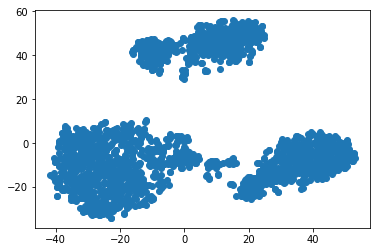

In [73]:
plt.scatter(x=embed_data[:, 0],
                y=embed_data[:, 1])

In [49]:
from sklearn.cluster import SpectralClustering

In [74]:
clustering = SpectralClustering(n_clusters=4, affinity='nearest_neighbors').fit(new_data)
clustering.labels_

array([1, 3, 0, ..., 0, 2, 2])

In [52]:
colors = ['red', 'green', 'blue', 'cyan', 'black', 'yellow', 'magenta', 'brown', 'plum', 'orange', 'darkcyan']


In [53]:
def scatter_plot_clusters(df):
    """

    :param df: dataframe
    :return: scatterplot
    """

    try:
        number_of_clusters = max(df['labels']) + 1
        for j in range(-1, number_of_clusters):
            if j == -1:
                label = 'noise'
            else:
                label = 'cluster %d' % j

            cluster = df.loc[df['labels'] == j]
            plt.scatter(x=cluster.iloc[:, 0],
                        y=cluster.iloc[:, 1],
                        color=colors[j],
                        label=label)

        plt.legend()
        plt.show()

    except Exception as e:
        print(e)

In [76]:
df = pd.DataFrame(embed_data)

In [58]:
df.head()

,0,1
0,-7.593285,-25.538328
1,33.534489,-21.310135
2,-29.590172,22.704235
3,29.992821,-30.882921
4,27.560026,-8.470230


In [77]:
df['labels'] = clustering.labels_

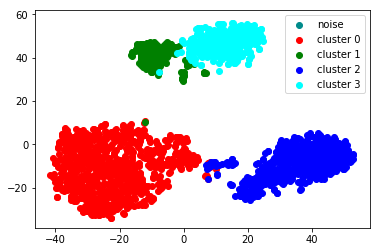

In [78]:
scatter_plot_clusters(df)

In [79]:
from sklearn.metrics import silhouette_score

In [82]:
new_data.drop(columns=['labels'], inplace=True)

In [86]:
silhouette_score(embed_data, labels=clustering.labels_, metric='euclidean')

0.5987761